<h1 style="text-align: center;">TF2202 Komputasi Rekayasa - Persamaan Diferensial Biasa</h1>
<h3 style="text-align: center;">Fadjar Fathurrahman</h3>

# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

In [3]:
import matplotlib
matplotlib.style.use("default")

In [4]:
import scipy.integrate

# Pendahuluan

Dalam notebook ini akan diberikan implementasi sederhana dari beberapa metode yang dapat digunakan untuk menyelesaikan persamaan diferensial biasa.

Bentuk umum dari persamaan diferensial biasa orde 1 adalah:

$$
y' = \frac{\mathrm{d}y}{\mathrm{d}x} = f(x,y)
$$

Solusi dari persamaan ini memiliki satu konstanta sembarang. Konstanta ini dapat ditentukan nilainya jika diberikan nilai $y$ pada suatu titik, misalnya $y(a) = \alpha$.

Persamaan diferensial biasa orde $n$ dapat dituliskan sebagai:

$$
y^{(n)} = \frac{\mathrm{d}^n y}{\mathrm{d}x^n} = f\left(x,y,y',\ldots,y^{(n-1)}\right)
$$

Dengan menggunakan notasi $y_0 = y$, $y_1 = y'$, $y_2 = y''$, $\ldots$, $y_{n-1} = y^{(n-1)}$, persamaan diferensial biasa orde $n$ dapat diubah menjadi persamaan diferensial oder satu sebagai berikut:

$$
\begin{align*}
y'_{0} &= y_{1} \\
y'_{1} &= y_{2} \\
y'_{2} &= y_{3} \\
\cdots & = \cdots \\
y'_{n} &= f\left(x,y_{0},y_{1},\ldots,y_{n-1}\right)
\end{align*}
$$

# Metode Euler

Misalkan kita memiliki persamaan diferensial:

$$
\frac{\mathrm{d}y}{\mathrm{d}x} = f(x,y)
$$

Metode Euler mengaproksimasi turunan pertama pada $x_i$ dengan $f(x_i, y_i)$ sehingga diperoleh:

$$
y_{i+1} = y_{i} + h f(x_i, y_i)
$$

Dengan diberikan syarat awal $y_0$ kita dapat menggunakan metode Euler untuk melakukan integrasi ODE.

$i$ mulai dari 0:
$$
\begin{align}
y_1 & = y_0 + hf(x_0,y_0) \\
y_2 & = y_1 + hf(x_1,y_1)
\end{align}
$$

## Implementasi metode Euler

In [10]:
def ode_euler(f, xi, xf, y0, N, verbose=False):
    
    h = (xf - xi)/N
    
    if verbose:
        print("ode_euler h = %18.10f\n" % (h))
    
    xsol = xi + np.arange(0,N+1)*h
    
    # orde dari ODE ditentukan dari jumlah syarat awal yang diberikan
    Ndim = len(y0)
    
    # array untuk solusi
    ysol = np.zeros((N+1,Ndim))
    
    # aplikasi syarat awal
    ysol[0,:] = y0[:]
    
    for i in range(N):
        ysol[i+1,:] = ysol[i,:] + h*f(xsol[i], ysol[i,:])
    
    return xsol, ysol

## Contoh 1

Cari solusi dari persamaan diferensial:

$$
y' + 4y = x^2
$$

pada rentang $x \in [0,1]$ dengan syarat awal $y(0) = 1$. Bandingkan hasil yang diperoleh dengan solusi analitik:

$$
y = \frac{31}{32}e^{-4x} + \frac{1}{4}x^2 - \frac{1}{8}x + \frac{1}{32}
$$

Ubah persamaan menjadi bentuk standar $y' = f(x,y)$

$$
y' = x^2 - 4y
$$

sehingga $f(x,y) = x^2 - 4y$

In [6]:
def my_ode_problem_01(x,y):
    return x**2 - 4*y

In [23]:
xi = 0.0
xf = 1.0
y0 = [1.0]  # syarat batas dalam bentuk list
Ninterval = 200
xsol, ysol = ode_euler(my_ode_problem_01, xi, xf, y0, Ninterval, verbose=True)

ode_euler h =       0.0050000000



In [24]:
def analytic_sol_01(x):
    return (31.0/32.0)*np.exp(-4*x) + x**2/4 - x/8 + 1.0/32.0

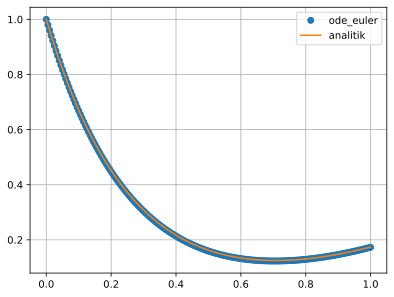

In [25]:
plt.clf()
plt.plot(xsol, ysol[:,0], label="ode_euler", marker="o", linewidth=0)
plt.plot(xsol, analytic_sol_01(xsol), label="analitik")
plt.grid(True)
plt.legend();

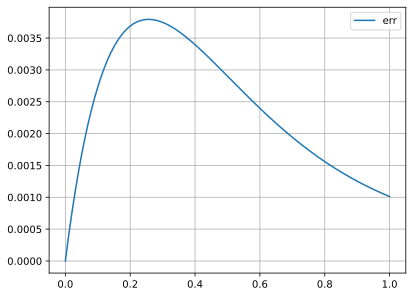

In [26]:
plt.clf()
plt.plot(xsol, np.abs(ysol[:,0] - analytic_sol_01(xsol)), label="err")
plt.grid(True)
plt.legend();

## Contoh 2

Selesaikan persamaan diferensial berikut:

$$
y'' = -0.1y' - x
$$

pada $x = 0$ sampai dengan 2 dengan syarat awal $y(0) = 0$ dan $y'(0) = 1$ dengan menggunakan ukuran langkah $h = 0.05$.

Bandingkan dengan solusi analitik:

$$
y = 100x - 5x^2 + 990\left( e^{-0.1x} - 1 \right)
$$

Bentuk umum persamaan diferensial orde-2
$$
y'' = f(x,y,y')
$$

Bentuk persamaan diferensial orde-1 (vektor)
$$
\mathbf{y}' = f(x, \mathbf{y})
$$

$$
\mathbf{y} = \begin{bmatrix}
y_1 \\ y_2
\end{bmatrix} = 
\begin{bmatrix}
y \\ y'
\end{bmatrix}
$$

$$
\mathbf{y}' = \begin{bmatrix}
y'_1 \\ y'_2
\end{bmatrix} = 
\begin{bmatrix}
y' \\ y''
\end{bmatrix}
$$

In [27]:
def my_ode_problem_02(x, y):
    f = np.zeros(2)
    f[0] = y[1]
    f[1] = -0.1*y[1] - x
    return f

In [29]:
def analytic_sol_02(x):
    return 100*x - 5*x**2 + 990*(np.exp(-0.1*x) - 1)

In [33]:
xi = 0.0
xf = 2.0
y0 = [0.0, 1.0]
h = 0.025
Ninterval = int( (xf - xi)/h )
xsol, ysol = ode_euler(my_ode_problem_02, xi, xf, y0, Ninterval, verbose=True)

ode_euler h =       0.0250000000



Plot $x$ dan $y$:

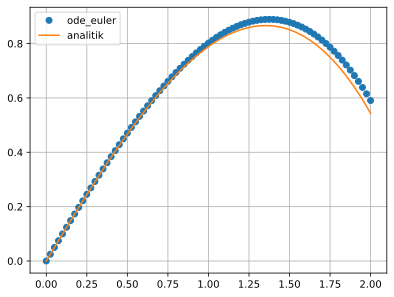

In [37]:
plt.clf()
plt.plot(xsol, ysol[:,0], label="ode_euler", marker="o", linewidth=0)
plt.plot(xsol, analytic_sol_02(xsol), label="analitik")
plt.grid(True)
plt.legend();

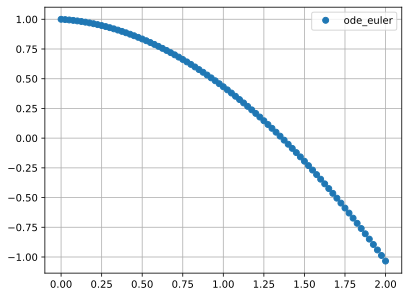

In [39]:
plt.clf()
plt.plot(xsol, ysol[:,1], label="ode_euler", marker="o", linewidth=0)
#plt.plot(xsol, analytic_sol_02(xsol), label="analitik")
plt.grid(True)
plt.legend();

## Contoh Chapra 25.1

Gunakan metode Euler untuk

$$
\frac{\mathrm{d}y}{\mathrm{d}x} = -2x^3 + 12x^2 - 20x + 8.5
$$

dari $x=0$ sampai $x = 4$ dengan ukuran langkah $h=0.5$. Syarat awal pada $x = 0$ adalah $y = 1.0$.

Bandingkan dengan solusi eksak:

$$
y = -0.5x^4 + 4x^3 - 10x^2 + 8.5 + 1
$$

In [40]:
xi = 0.0
xf = 4.0
h = 0.5
Ninterval = int((xf - xi)/h)
y0 = [1.0]

def chapra_ex_25_1(x, y):
    f = np.zeros(1)
    f[0] = -2*x**3 + 12*x**2 - 20*x + 8.5
    return f

def exact_chapra_ex_25_1(x):
    return -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1
    
xsol, ysol = ode_euler(chapra_ex_25_1, xi, xf, y0, Ninterval)

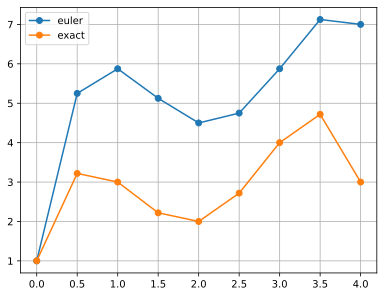

In [42]:
plt.clf()
plt.plot(xsol, ysol, marker="o", label="euler")
plt.plot(xsol, exact_chapra_ex_25_1(xsol), marker="o", label="exact")
plt.grid(True)
plt.legend();

Menggunakan $h$ yang lebih kecil:

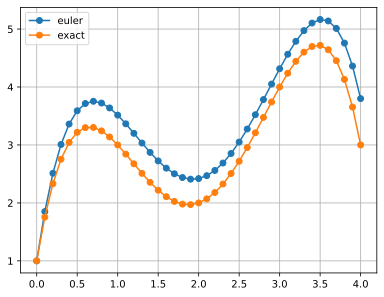

In [44]:
xi = 0.0
xf = 4.0
h = 0.1
Ninterval = int((xf - xi)/h)
y0 = [1.0]

def chapra_ex_25_1(x, y):
    f = np.zeros(1)
    f[0] = -2*x**3 + 12*x**2 - 20*x + 8.5
    return f

def exact_chapra_ex_25_1(x):
    return -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1
    
xsol, ysol = ode_euler(chapra_ex_25_1, xi, xf, y0, Ninterval)

plt.clf()
plt.plot(xsol, ysol, marker="o", label="euler")
plt.plot(xsol, exact_chapra_ex_25_1(xsol), marker="o", label="exact")
plt.grid(True)
plt.legend();

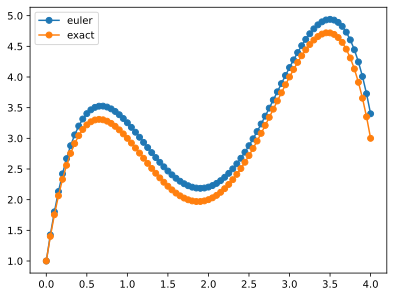

In [45]:
xi = 0.0
xf = 4.0
h = 0.05
Ninterval = int((xf - xi)/h)
y0 = [1.0]

def chapra_ex_25_1(x, y):
    f = np.zeros(1)
    f[0] = -2*x**3 + 12*x**2 - 20*x + 8.5
    return f

def exact_chapra_ex_25_1(x):
    return -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1
    
xsol, ysol = ode_euler(chapra_ex_25_1, xi, xf, y0, Ninterval)

plt.clf()
plt.plot(xsol, ysol, marker="o", label="euler")
plt.plot(xsol, exact_chapra_ex_25_1(xsol), marker="o", label="exact")
plt.legend();

# Metode Heun

$$
y_{i+1}^{0} = y_{i} + f(x_i, y_i) h
$$

$$
y_{i+1} = y_{i} + h\frac{f(x_{i}, y_{i}) + f(x_{i+1}, y^{0}_{i+1})}{2}
$$

In [46]:
def ode_heun(f, xi, xf, y0, N, verbose=False):
    
    h = (xf - xi)/N
    
    if verbose:
        print("ode_heun h = %18.10f\n" % (h))
    
    xsol = xi + np.arange(0,N+1)*h
    
    # orde dari ODE ditentukan dari jumlah syarat awal yang diberikan
    Ndim = len(y0)
    
    # array untuk solusi
    ysol = np.zeros((N+1,Ndim))
    
    # aplikasi syarat awal
    ysol[0,:] = y0[:]
    y0_pred = np.zeros(Ndim)

    for i in range(N):
        y0_pred[:] = ysol[i,:] + h*f(xsol[i], ysol[i,:])
        ysol[i+1,:] = ysol[i,:] + 0.5*h*( f(xsol[i], ysol[i]) + f(xsol[i+1], y0_pred[:]) )
    
    return xsol, ysol

Contoh aplikasi pada soal Chapra 25.1

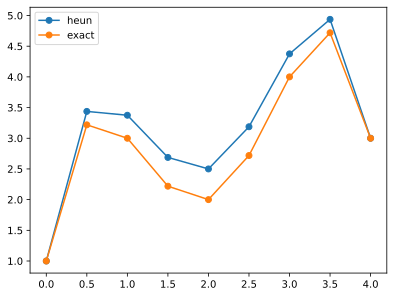

In [47]:
xi = 0.0
xf = 4.0
h = 0.5
Ninterval = int((xf - xi)/h)
y0 = [1.0]

def chapra_ex_25_1(x, y):
    f = np.zeros(1)
    f[0] = -2*x**3 + 12*x**2 - 20*x + 8.5
    return f

def exact_chapra_ex_25_1(x):
    return -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1
    
xsol, ysol = ode_heun(chapra_ex_25_1, xi, xf, y0, Ninterval)

plt.clf()
plt.plot(xsol, ysol, marker="o", label="heun")
plt.plot(xsol, exact_chapra_ex_25_1(xsol), marker="o", label="exact")
plt.legend();

# Metode Midpoint (improved polygon atau modified Euler)

Gunakan metode Euler untuk memprediksi nilai dari $y$ pada titik tengah dari interval:

$$
y_{i+1/2} = y_{i} + f(x_i, y_i)\frac{h}{2}
$$

Nilai ini digunakan untuk menghitung kemiringan pada titik tengah:

$$
y'_{i+1/2} = f(x_{i+1/2}, y_{i+1/2})
$$

yang diasumsikan sebagai aproksimasi dari kemiringan rata-rata untuk seluruh interval.

Kemiringan ini kemudian digunakan untuk mengekstrapolasi linear dari $x_i$ ke $x_{i+1}$:

$$
y_{i+1} = y_{i} + h f( x_{i+1/2}, y_{i+1/2} )
$$

# Metode Runge-Kutta orde 4

In [ ]:
def ode_RK4(f, xi, xf, y0, N, verbose=False):
    
    h = (xf - xi)/N
    
    if verbose:
        print("ode_RK4 h = %18.10f\n" % (h))
    
    xsol = xi + np.arange(0,N+1)*h
    
    # orde dari ODE ditentukan dari jumlah syarat awal yang diberikan
    Ndim = len(y0)
    
    # array untuk solusi
    ysol = np.zeros((N+1,Ndim))
    
    # aplikasi syarat awal
    ysol[0,:] = y0[:]
    
    for i in range(N):
        f1 = h*f( xsol[i], ysol[i,:] )
        f2 = h*f( xsol[i] + h/2, ysol[i,:] + f1/2 )
        f3 = h*f( xsol[i] + h/2, ysol[i,:] + f2/2 )
        f4 = h*f( xsol[i] + h, ysol[i,:] + f3 )
        ysol[i+1,:] = ysol[i,:] + (f1 + 2*(f2 + f3) + f4)/6
    
    return xsol, ysol

### Contoh

In [ ]:
xi = 0.0
xf = 2.0
y0 = [0.0, 1.0]
h = 0.05
Ninterval = int( (xf - xi)/h )
xsol, ysol = ode_RK4(my_ode_problem_02, xi, xf, y0, Ninterval, verbose=True)

In [ ]:
plt.clf()
plt.plot(xsol, ysol[:,0], label="ode_RK4", marker="o", linewidth=0)
plt.plot(xsol, analytic_sol_02(xsol), label="analitik")
plt.legend();

# Latihan soal di slide

In [ ]:
def soal_slide_no15(x, y):
    return -2*x**3 + 12*x**2 - 20*x + 8.5

In [ ]:
def soal_slide_no15_analitik(x):
    return -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

In [ ]:
xi = 0.0
xf = 4.0
y0 = [1.0] # syarat awal
h = 0.5
Ninterval = int( (xf - xi)/h )
xsol, ysol = ode_euler(soal_slide_no15, xi, xf, y0, Ninterval, verbose=True)

In [ ]:
plt.clf()
plt.plot(xsol, ysol)
plt.plot(xsol, soal_slide_no15_analitik(xsol))

In [ ]:
xi = 0.0
xf = 4.0
y0 = [1.0] # syarat awal
hh = [0.5, 0.25, 0.1]

plt.clf()
for h in hh:
    Ninterval = int( (xf - xi)/h )
    xsol, ysol = ode_euler(soal_slide_no15, xi, xf, y0, Ninterval)
    plt.plot(xsol, ysol, label="h = "+str(h))
plt.plot(xsol, soal_slide_no15_analitik(xsol), label="analitik")
plt.legend()
plt.title("Menggunakan ode_euler")

In [ ]:
xi = 0.0
xf = 4.0
y0 = [1.0] # syarat awal
hh = [0.5, 0.25, 0.1]

plt.clf()
for h in hh:
    Ninterval = int( (xf - xi)/h )
    xsol, ysol = ode_RK4(soal_slide_no15, xi, xf, y0, Ninterval)
    plt.plot(xsol, ysol, label="h = "+str(h))
plt.plot(xsol, soal_slide_no15_analitik(xsol), label="analitik")
plt.legend()
plt.title("Menggunakan ode_RK4")

In [ ]:
def soal_slide_no34(x, y):
    f = np.zeros(2)
    f[0] = y[1]
    f[1] = -10.0
    return f

In [ ]:
h = 0.1
xi = 0.0
xf = 100.0
y0 = [0.0, 100.0]
Ninterval = int( (xf - xi)/h )
xsol, ysol = ode_RK4(soal_slide_no34, xi, xf, y0, Ninterval, verbose=True)

In [ ]:
plt.clf()
plt.plot(xsol, ysol[:,0])